<a href="https://colab.research.google.com/github/baibai25/patoyata-gacha/blob/main/patoyata_gacha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import urllib
from PIL import Image
import matplotlib.pyplot as plt
import re

## gacha ratio simulation
- SSR: 3%
- SR: 18%
- R: 79%

In [ ]:
np.random.seed()

In [ ]:
rare = ['SSR', 'SR', 'R']
# proba = [0.03, 0.18, 0.79]
proba = [0.01, 0.09, 0.90]
sample_size = 10000

In [ ]:
test_result = np.random.choice(a=rare, size=sample_size, p=proba)

In [ ]:
cnt = Counter(test_result)
print(cnt)
print(np.array(list(cnt.values())))
print(100 * np.array(list(cnt.values())) / sample_size)

Counter({'R': 9050, 'SR': 850, 'SSR': 100})
[9050  850  100]
[90.5  8.5  1. ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


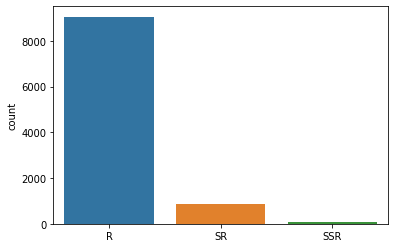

In [ ]:
sns.countplot(test_result)

## dataset

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nx47RQNXMtTrE3ntYsV9xtRsESGDmkO3pkWFbjKj3IM/edit#gid=0').sheet1

In [ ]:
df = pd.DataFrame(worksheet.get_all_values())
df.columns = list(df.loc[0, :])
df.drop(0, inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [ ]:
tmp = []
for url in df['share_url']:
  if url == '':
    tmp.append('')
  else:
    id = re.search( r'(?<=d/).*(?=\/)', url)[0]
    tmp.append(f'https://drive.google.com/uc?export=view&id={id}')

df['url'] = tmp
df.drop('share_url', axis=1, inplace=True)
del tmp

## キャラ一覧

In [ ]:
df[['rare', 'name']]

,rare,name
0,SSR,Chris
1,SSR,Donnis
2,SSR,大谷遺伝子パト
3,SSR,Vカツ パト
4,SSR,Vカツ ヤタ
5,SSR,Mirrativ パト
6,SSR,Mirrativ ヤタ
7,SSR,パトちゃん
8,SSR,ヤタちゃん
9,SSR,スパプリ


## gacha

In [ ]:
def get_rare_result(rare, sample_size, proba):
  # np.random.seed()
  return np.random.choice(a=rare, size=sample_size, p=proba) # TODO: add pickup proba

In [ ]:
def get_items(rare_result, df):
  count = Counter(rare_result)
  
  result = pd.DataFrame([], columns=df.columns)
  for rare, count in count.items():
    result = pd.concat([result, df[df['rare'] == rare].sample(n=count, replace=True).reset_index()], axis=0)
  return result

In [ ]:
def set_params(size):
  rare = ['SSR', 'SR', 'R']
  # proba = [0.03, 0.18, 0.79]
  proba = [0.01, 0.09, 0.90]
  sample_size = size

  # check proba
  cnt = 0
  for val in proba:
    cnt += val
  assert val != 1.0

  return rare, proba, sample_size

In [ ]:
def get_concat_h(im1, im2):
  dst = Image.new('RGB', (im1.width + im2.width, im1.height))
  dst.paste(im1, (0, 0))
  dst.paste(im2, (im1.width, 0))
  return dst

def get_concat_h_multi_blank(im_list):
  _im = im_list.pop(0)
  for im in im_list:
    _im = get_concat_h(_im, im)
  return _im

def display_images(result):
  url_list = []
  for url in result['url']:
    img = Image.open(urllib.request.urlopen(url))
    # url_list.append(img.resize((img.width // 2, img.height // 2)))
    url_list.append(img.resize((124, 124)))
  display(get_concat_h_multi_blank(url_list))

  for img in url_list:
    img.close()

In [ ]:
def execute(size):
  rare, proba, sample_size =  set_params(size)
  rare_result = get_rare_result(rare, sample_size, proba)
  result = get_items(rare_result, df)
  # display_images(result)
  return result

In [ ]:
cnt = 0
np.random.seed()

In [ ]:
result = execute(10)
cnt += 1 * 10
print(f'現在{cnt}連中')
result[['rare', 'name']]

現在40連中


,rare,name
0,R,久我
1,R,賞味期限切れの海苔
2,R,カラス
3,R,溶かしたヤタ
4,R,ぞうさん
5,R,ほうれん草とベーコンのクリームパスタ
6,R,久我
0,SR,RINDOU
1,SR,ひつじちゃん
2,SR,MaC


## warning
`display_images`実行しすぎると`HTTPError: HTTP Error 403: Forbidden`がでます。
しばらく時間をおけば直るはず。。。

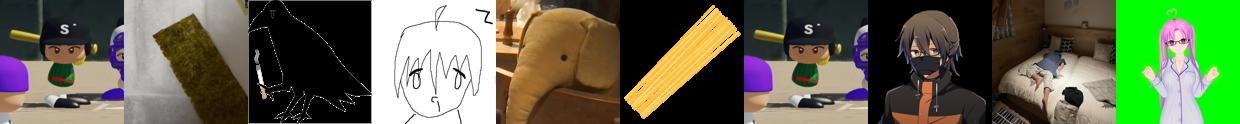

In [ ]:
display_images(result)